Content

The data contains the following information:

- Country- this is the country for which the vaccination information is provided;
- Country ISO Code - ISO code for the country;
- Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
- Total number of vaccinations - this is the absolute number of total immunizations in the country;
- Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
- Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
- Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
- Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
- Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
- Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
- Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
- Number of vaccinations per day - number of daily vaccination for that day and country;
- Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
- Vaccines used in the country - total number of vaccines used in the country (up to date);
- Source name - source of the information (national authority, international organization, local organization etc.);
- Source website - website of the source of information;

## Acknowledgements

I would like to specify that I am only making available Our World in Data collected data about vaccinations to Kagglers. My contribution is very small, just daily collection, merge and upload of the updated version, as maintained by Our World in Data in their GitHub repository.

## Inspiration

Track COVID-19 vaccination in the World, answer instantly to your questions:

- Which country is using what vaccine?
- In which country the vaccination programme is more advanced?
- Where are vaccinated more people per day? But in terms of percent from entire population ?

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Read in data 

covid_df = pd.read_csv('country_vaccinations.csv')
covid_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7488 non-null   object 
 1   iso_code                             7488 non-null   object 
 2   date                                 7488 non-null   object 
 3   total_vaccinations                   4625 non-null   float64
 4   people_vaccinated                    4118 non-null   float64
 5   people_fully_vaccinated              2794 non-null   float64
 6   daily_vaccinations_raw               3891 non-null   float64
 7   daily_vaccinations                   7301 non-null   float64
 8   total_vaccinations_per_hundred       4625 non-null   float64
 9   people_vaccinated_per_hundred        4118 non-null   float64
 10  people_fully_vaccinated_per_hundred  2794 non-null   float64
 11  daily_vaccinations_per_million

__Conclusion From Data__

- 9 columns are missing values 
- Date time should be converted to DateTime type 
- Source name & Source website are not needed

In [4]:
covid_df.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     2863
people_vaccinated                      3370
people_fully_vaccinated                4694
daily_vaccinations_raw                 3597
daily_vaccinations                      187
total_vaccinations_per_hundred         2863
people_vaccinated_per_hundred          3370
people_fully_vaccinated_per_hundred    4694
daily_vaccinations_per_million          187
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

## Cleaning Process

<AxesSubplot:>

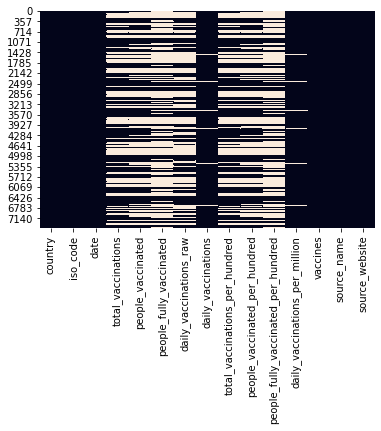

In [5]:
sns.heatmap(covid_df.isnull(), cbar=False)

__Conclusion From Data__


- Missing high amounts of data from columns
- Need to determine which ones can be completely removed or replace values with 0 or mean/median/mode 


In [6]:
# Get percentage of misisng data to determine right action
null_count = covid_df.isnull().sum()
total_rows = covid_df.shape[0]
null_count_pct = (null_count/total_rows)*100
null_count_pct

country                                 0.000000
iso_code                                0.000000
date                                    0.000000
total_vaccinations                     38.234509
people_vaccinated                      45.005342
people_fully_vaccinated                62.686966
daily_vaccinations_raw                 48.036859
daily_vaccinations                      2.497329
total_vaccinations_per_hundred         38.234509
people_vaccinated_per_hundred          45.005342
people_fully_vaccinated_per_hundred    62.686966
daily_vaccinations_per_million          2.497329
vaccines                                0.000000
source_name                             0.000000
source_website                          0.000000
dtype: float64

- Decimal points are too long. Better to keep it at 0.00 instead. 

In [7]:
covid_df["date"] = pd.to_datetime(covid_df["date"], format = '%Y-%m-%d')
covid_df = covid_df.replace([np.inf, -np.inf], np.nan)
covid_df = covid_df.fillna(0)

In [8]:
#Check Date time has been converted 
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              7488 non-null   object        
 1   iso_code                             7488 non-null   object        
 2   date                                 7488 non-null   datetime64[ns]
 3   total_vaccinations                   7488 non-null   float64       
 4   people_vaccinated                    7488 non-null   float64       
 5   people_fully_vaccinated              7488 non-null   float64       
 6   daily_vaccinations_raw               7488 non-null   float64       
 7   daily_vaccinations                   7488 non-null   float64       
 8   total_vaccinations_per_hundred       7488 non-null   float64       
 9   people_vaccinated_per_hundred        7488 non-null   float64       
 10  people_fully

In [9]:
covid_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [10]:
# Drop unnecessary columns 
covid_df.drop(columns=['source_name', 'source_website'], axis=0, inplace=True)
covid_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oxford/AstraZeneca
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca


In [27]:
total_people_fully_vaccinated = total_people_fully_vaccinated.dropna()

total_people_fully_vaccinated.shape

(150, 2)

In [51]:
print(covid_df.vaccines.unique())

['Oxford/AstraZeneca' 'Pfizer/BioNTech' 'Sputnik V'
 'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V'
 'Oxford/AstraZeneca, Pfizer/BioNTech'
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech' 'Sinovac'
 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'
 'Oxford/AstraZeneca, Sinovac' 'Sinopharm/Beijing'
 'Pfizer/BioNTech, Sinovac' 'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac'
 'Moderna, Pfizer/BioNTech' 'Moderna' 'Moderna, Oxford/AstraZeneca'
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'
 'Covaxin, Oxford/AstraZeneca' 'Pfizer/BioNTech, Sinopharm/Beijing'
 'Sinopharm/Beijing, Sputnik V'
 'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V'
 'Oxford/AstraZeneca, Sinopharm/Beijing' 'EpiVacCorona, Sputnik V'
 'Johnson&Johnson'
 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V'
 'Johnson&Johnson, Moderna, Pfizer/BioNTech']


## EDA Process

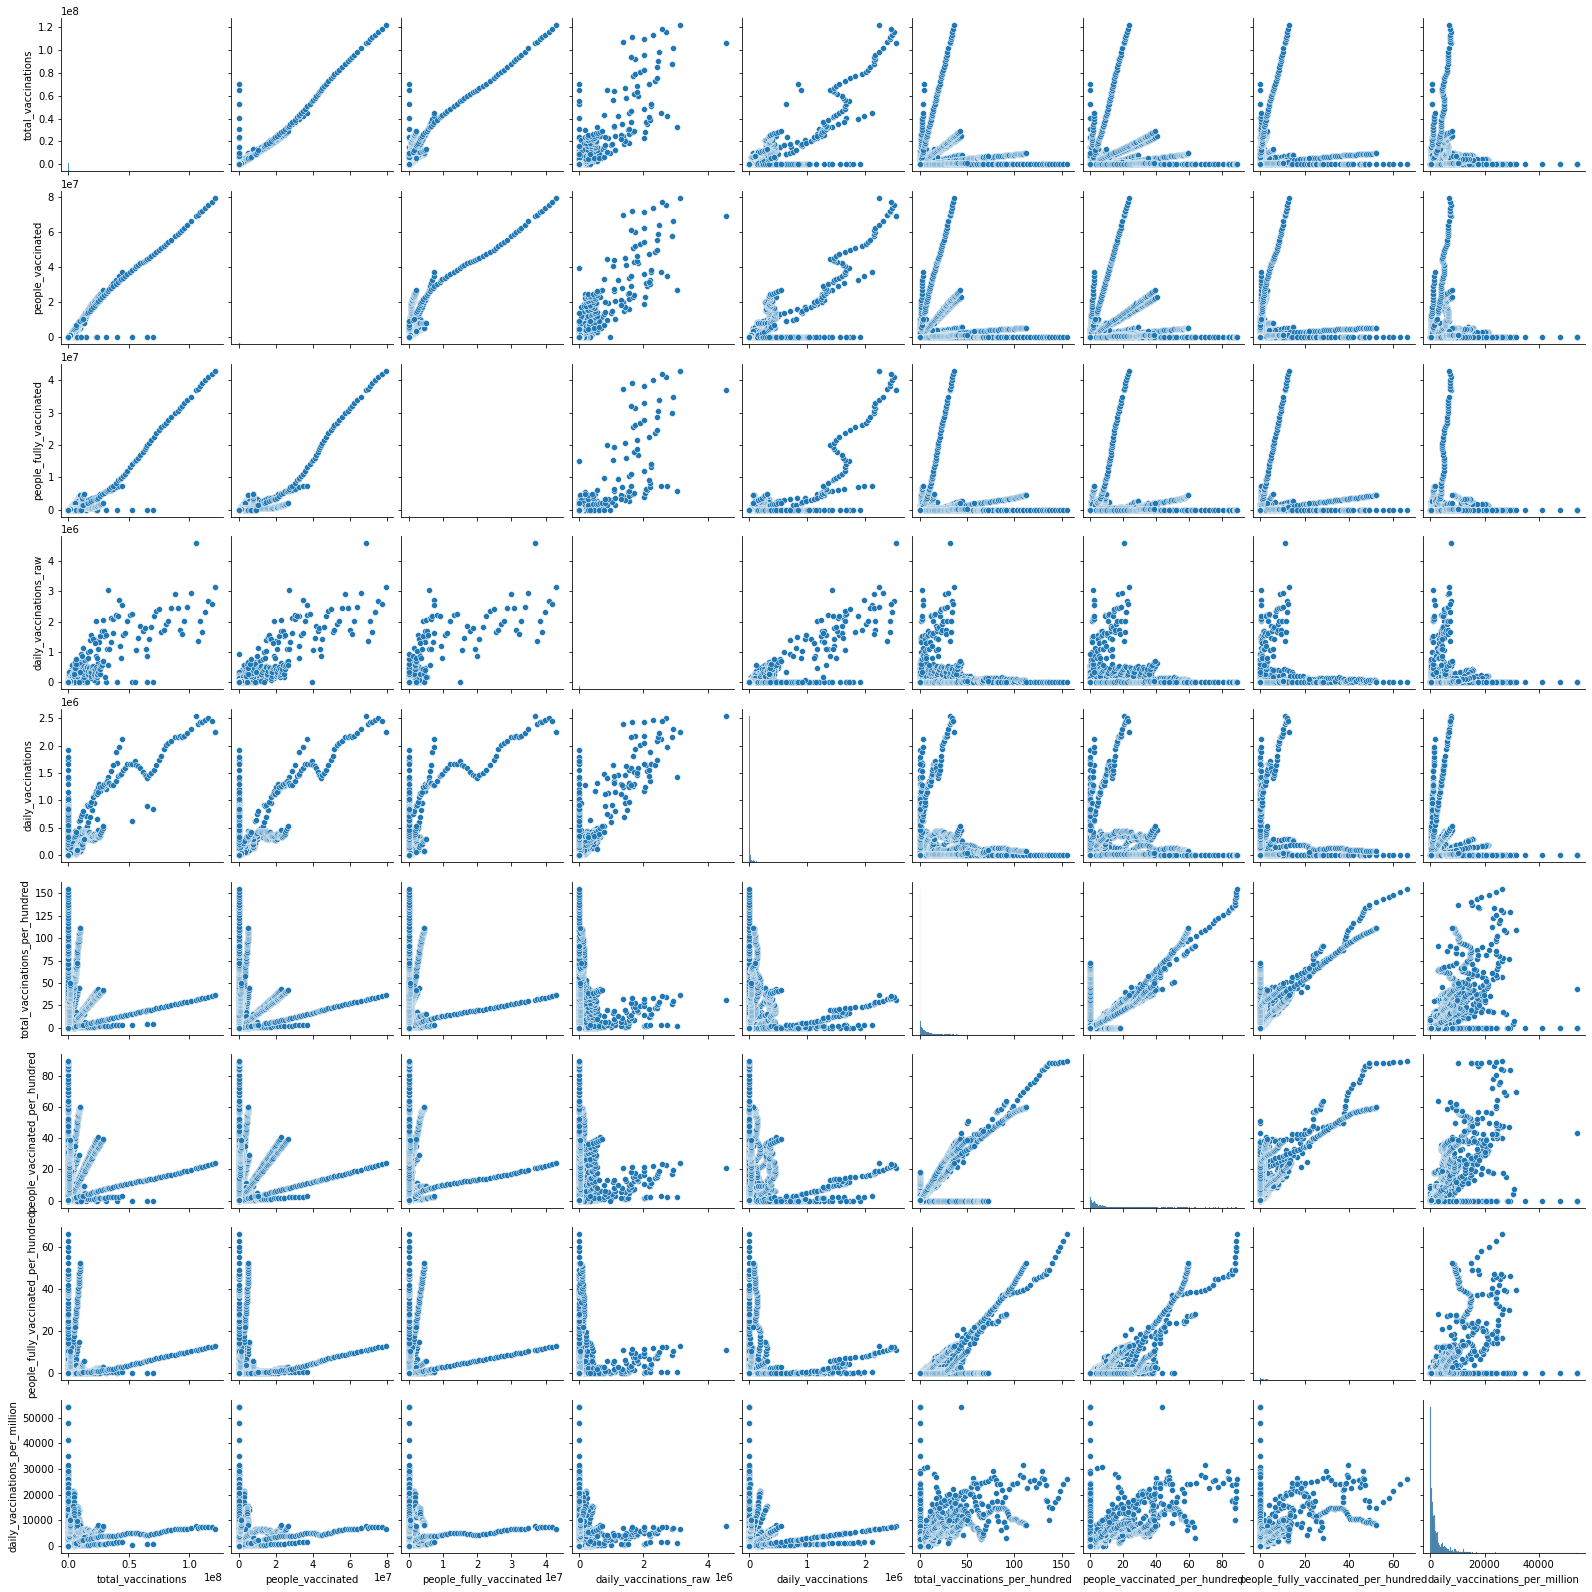

In [11]:
sns.pairplot(covid_df)

In [12]:
covid_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oxford/AstraZeneca
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca
